In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange
from random import seed
import operator
seed(90)

## Pré-processando os Dados

In [17]:
K = [1,2,3,5,7,9,11,13,15]

kc1 = pd.read_csv('KC1.csv')
cm1 = pd.read_csv('CM1.csv')
kc1.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,65,10,6,0,18.0,25.0,107.0,64.0,21.0,True
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,37,2,5,0,16.0,28.0,89.0,52.0,15.0,True
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,21,0,2,0,11.0,10.0,41.0,17.0,5.0,True


In [548]:
kc1 = (kc1 - kc1.min())/(kc1.max() - kc1.min())
cm1 = (cm1 - cm1.min())/(cm1.max() - cm1.min())

## Implementação do Algoritmo KNN

In [4]:
def euclidean_distance(x,y):
    ret = 0
    w = list(zip(x,y))

    for a,b in w:
        ret += (a-b)**2

    return ret

In [5]:
import operator

def knn(k, X, y, distance_function, *args):
    
    distance = [ ( distance_function( x,*args), y[i]) for i,x in enumerate(X)]
    
    distance = sorted(distance, key=operator.itemgetter(0))
    votes = {}
    votes_w = {}
        
    for i in range(k):
        t_class = distance[i][1]
        
        if(distance[i][0] == 0):
            return t_class, t_class
            
        try:
            votes[t_class] += 1
            votes_w[t_class] += 1 / distance[i][0]    
        except:
            votes[t_class] = 1
            votes_w[t_class] = 1 / distance[i][0]
    
        
    predicted_class = max(votes.items(), key=operator.itemgetter(1))[0]
    predicted_class_w = max(votes_w.items(), key=operator.itemgetter(1))[0]
    
    return predicted_class, predicted_class_w

In [551]:
def predict(k, X_train, y_train, X_test, y_test):
    
    ret_list = []
    for i, x in enumerate(X_test):
        y1, y_weighted = knn(k, X_train, y_train, euclidean_distance, x)
        ret_list.append((y1, y_weighted, y_test[i]))
    
    return ret_list

In [6]:
def get_accuracy(t_list):
    not_weighted = 0
    weighted = 0
    for x,y,z in t_list:
        if x == z:
            not_weighted += 1
        if y == z:
            weighted += 1
    return not_weighted/len(t_list), weighted/len(t_list)

In [7]:
def accuracy_mean(l):
    mean1 = 0
    mean2 = 0
    for x,y in l:
        mean1 += x
        mean2 += y
    
    return mean1 / len(l), mean2 / len(l)

In [8]:
from sklearn.model_selection import StratifiedKFold


def eval_model(k, X, y, predict):

    skf = StratifiedKFold(n_splits=5)
    
    ret_list = []
    for train_index, test_index in skf.split(X,y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train = list(X_train.itertuples(index=False))
        X_test = list(X_test.itertuples(index=False))
        y_train = list(y_train)
        y_test = list(y_test)
        
        t_list = predict(k, X_train, y_train, X_test, y_test)
        accuracy, accuracy_w = get_accuracy(t_list)
        ret_list.append((accuracy, accuracy_w))
    
    
    return accuracy_mean(ret_list)

In [9]:
def start_knn_k_fold(train, predict):
       
    target = list(train)[-1]
    X = train.drop(target, axis = 1)
    y = train[target]
    
    ret_list = []
    for k in K:
        ret_list.append(eval_model(k,X,y,predict))
        
    return ret_list

In [10]:
def plot_(accuracy, ax):
    x,y = zip(*accuracy)
    ax.plot( K , y,'r-',label='weighted')
    ax.plot( K , x,'b-',label='not weighted')
    ax.legend()
    ax.set_xlabel('K')
    ax.set_ylabel('accuracy')

In [572]:
accuracy = start_knn_k_fold(kc1,predict)
accuracy2 = start_knn_k_fold(cm1,predict)

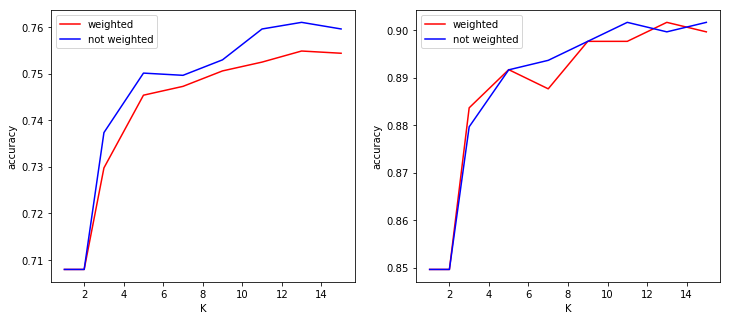

In [573]:
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plot_(accuracy,ax)
plot_(accuracy2,ax2)
plt.show()

# Questão 2

# KNN com dados categóricos

In [558]:
tic_tac = pd.read_csv('tic-tac-toe.csv')
car_evaluation = pd.read_csv('car_evaluation.csv')

tic_tac['class'] = tic_tac['class'].astype('category').cat.codes
tic_tac['class'] = tic_tac['class'].astype('int64')
car_evaluation['class'] = car_evaluation['class'].astype('category').cat.codes
car_evaluation['class'] = car_evaluation['class'].astype('int64')

In [11]:
def foo(df,y):
    attrs = list(df)
    N = {}
    n_class = len(pd.Series(y).unique())
    
    for i, val in enumerate(attrs):
        N[i] = {}
        a = df[val].unique()
        for j in a:
            N[i][j] = [0] * n_class
    

    for j,x in enumerate(df.itertuples(index=False)):
        for i in range(len(attrs)):
            if not pd.isnull(x[i]):
                N[i][x[i]][y[j]] += 1
                
    return N

In [12]:
def vdm(i,a,b,classes_list,N):
    ret = 0
    
    if b not in N[i]:
        return len(classes_list)   
    
    for c in classes_list:    
        p1 = float(N[i][a][c]) / sum(N[i][a])
        p2 = float(N[i][b][c]) / sum(N[i][b])
        ret += abs(p1 - p2)
    
    return ret

In [13]:
def VDM(a,b,classes_list,N):
    w = list(zip(a,b))
    ret = 0
    for i,(x,y) in enumerate(w):
        ret += vdm(i,x,y,classes_list,N)
        
    return ret

In [562]:
def predict_vdm(k, X_train, y_train, X_test, y_test):
    df = pd.DataFrame(X_train)
    N = foo(df,y_train)
    classes_list = pd.Series(y_train).unique()
    ret_list = []
    for i, x in enumerate(X_test):
        y1, y_weighted = knn(k, X_train, y_train, VDM, x, classes_list, N)
        ret_list.append((y1,y_weighted,y_test[i]))
    return ret_list

In [563]:
accuracy_vdm = start_knn_k_fold(tic_tac, predict_vdm)
accuracy_vdm2 = start_knn_k_fold(car_evaluation, predict_vdm)

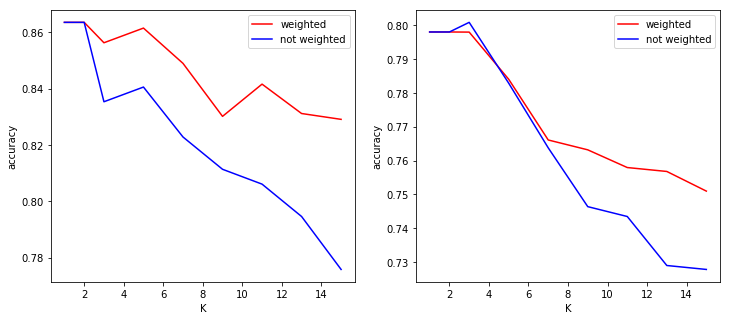

In [564]:
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plot_(accuracy_vdm, ax)
plot_(accuracy_vdm2, ax2)
plt.show()

# Questão 3

# KNN com dados heterogêneos

In [18]:
credit_approval = pd.read_csv('credit-screening.csv')
tae = pd.read_csv('tae.csv')

In [19]:
credit_approval.replace('?',np.nan, inplace=True)

credit_approval[['A2', 'A14']] = credit_approval[ ['A2', 'A14'] ].astype('float64')


credit_approval['A16'] = credit_approval['A16'].astype('category').cat.codes
credit_approval['A16'] = credit_approval['A16'].astype('int64')


print(credit_approval.dtypes)
credit_approval.head()

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16      int64
dtype: object


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,0
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,0
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,0
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,0


In [37]:
tae['class size'] = tae['class size'].astype('int64')
tae['class'] = tae['class'].astype('int64')
tae['class'] = tae['class'].astype('category').cat.codes
tae['class'] = tae['class'].astype('int64')

category_columns = ['native english', 'course instructor', 'course', 'season']
tae[category_columns] = tae[category_columns].astype(str)

print(tae.dtypes)
tae.head()

native english       object
course instructor    object
course               object
season               object
class size            int64
class                 int64
dtype: object


,native english,course instructor,course,season,class size,class
0,1,23,3,1,19,2
1,2,15,3,1,17,2
2,1,23,3,2,49,2
3,1,5,2,2,33,2
4,2,7,11,2,55,2


In [53]:
def HVDM(a,b,classes_list,N,l):
    w = list(zip(a,b))
    ret = 0

    for i,(x,y) in enumerate(w):
        if(pd.isnull(x) ^ pd.isnull(y)):
            ret += 1
        elif(pd.isnull(x) and pd.isnull(y)):
            pass
        elif(i in l):
            ret += (abs(x - y)/ (l[i][0] - l[i][1]))**2
        else:
            ret += vdm(i, x, y, classes_list, N)**2

            
    return ret

In [54]:
def predict_hvdm(k, X_train, y_train, X_test, y_test):
    
    df = pd.DataFrame(X_train)
    N = foo(df, y_train)
    classes_list = pd.Series(y_train).unique()
    ret_list = []
    
    all_columns = list(df)
    w = {}
    
    for i,val in enumerate(all_columns):
        if(df[val].dtype.name == 'int64' or df[val].dtype.name == 'float64'):
            w[i] = (df[val].max(), df[val].min())
            

    for i, x in enumerate(X_test):
        y1, y_weighted = knn(k, X_train, y_train, HVDM, x, classes_list, N, w)
        ret_list.append((y1,y_weighted,y_test[i]))
                        
    return ret_list

In [55]:
accuracy_hvdm = start_knn_k_fold(tae.copy(), predict_hvdm)
accuracy2_hvdm = start_knn_k_fold(credit_approval, predict_hvdm)

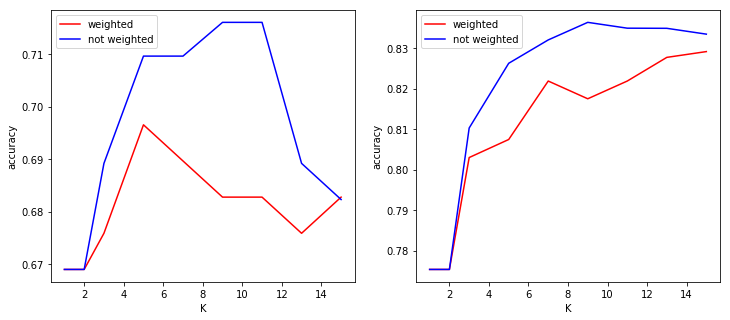

In [58]:
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plot_(accuracy_hvdm, ax)
plot_(accuracy2_hvdm,ax2)
plt.show()